In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from scipy.stats import norm, entropy
from scipy import stats
from scipy.stats import ttest_ind, chi2_contingency

In [ ]:
from scipy.stats import pearsonr as pcr
from collections import Counter as counter

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
from feature_engine.encoding import (
    MeanEncoder,
    OneHotEncoder,
    CountFrequencyEncoder,
    RareLabelEncoder
)

from sklearn.pipeline import Pipeline as pipe

In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


drop rows that are null

In [ ]:
df["churn_risk_score"].unique()

array([ 2,  1,  5,  3,  4, -1], dtype=int64)

In [ ]:
df = df[df["churn_risk_score"].isin([ 2.,  1.,  5.,  3.,  4.])]
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [ ]:
df["churn_risk_score"].unique()

array([2, 1, 5, 3, 4], dtype=int64)

In [ ]:
df.drop(columns=["customer_id", "referral_id", "Name"], inplace=True)

In [ ]:
df.drop(columns=["last_visit_time"], inplace=True)

In [ ]:
df.drop(columns=["security_no"], inplace=True)

In [ ]:
df.columns

Index(['age', 'gender', 'region_category', 'membership_category',
       'joining_date', 'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [ ]:
def discover_categorical_and_numerical(df):
  type_dictionary = {col: ("categorical" if df[col].dtype == "O" else "numerical") for col in df.columns}
  categorical = [key for key, val in type_dictionary.items() if val == "categorical"]
  numerical = df.columns.difference(categorical)
  return categorical, numerical

In [ ]:
categorical, numerical = discover_categorical_and_numerical(df)
categorical

['gender',
 'region_category',
 'membership_category',
 'joining_date',
 'joined_through_referral',
 'preferred_offer_types',
 'medium_of_operation',
 'internet_option',
 'avg_frequency_login_days',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint',
 'complaint_status',
 'feedback']

In [ ]:
numerical = numerical.to_list()

In [ ]:
numerical.remove("churn_risk_score")
numerical

['age',
 'avg_time_spent',
 'avg_transaction_value',
 'days_since_last_login',
 'points_in_wallet']

In [ ]:
def convert_categorical_to_numerical_forcefully(df, columns):
  for c in columns:
    df[c] = pd.to_numeric(df[c], errors='coerce')
    df[c].fillna(np.mean(df[c]), inplace=True)
  return df

In [ ]:
df = convert_categorical_to_numerical_forcefully(df, ["avg_frequency_login_days"])
df.head()

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,Village,Platinum Membership,2017-08-17,No,Gift Vouchers/Coupons,?,Wi-Fi,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,32,F,City,Premium Membership,2017-08-28,?,Gift Vouchers/Coupons,Desktop,Mobile_Data,16,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,44,F,Town,No Membership,2016-11-11,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,37,M,City,No Membership,2016-10-29,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,31,F,City,No Membership,2017-09-12,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [ ]:
for c in categorical:
  print(f"{c}: {df[c].unique()}")

gender: ['F' 'M' 'Unknown']
region_category: ['Village' 'City' 'Town' nan]
membership_category: ['Platinum Membership' 'Premium Membership' 'No Membership'
 'Gold Membership' 'Silver Membership' 'Basic Membership']
joining_date: ['2017-08-17' '2017-08-28' '2016-11-11' ... '2017-12-11' '2016-09-25'
 '2017-04-15']
joined_through_referral: ['No' '?' 'Yes']
preferred_offer_types: ['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers' nan]
medium_of_operation: ['?' 'Desktop' 'Smartphone' 'Both']
internet_option: ['Wi-Fi' 'Mobile_Data' 'Fiber_Optic']
avg_frequency_login_days: [17.         10.         22.         ... -9.32551114 -8.75932971
 27.83992744]
used_special_discount: ['Yes' 'No']
offer_application_preference: ['Yes' 'No']
past_complaint: ['No' 'Yes']
complaint_status: ['Not Applicable' 'Solved' 'Solved in Follow-up' 'Unsolved'
 'No Information Available']
feedback: ['Products always in Stock' 'Quality Customer Care' 'Poor Website'
 'No reason specified' 'Poor Product Q

In [ ]:
for c in categorical:
  df[c].fillna("unknown", inplace=True)

In [ ]:
for c in categorical:
  print(f"{c}: {df[c].unique()}")

gender: ['F' 'M' 'Unknown']
region_category: ['Village' 'City' 'Town' 'unknown']
membership_category: ['Platinum Membership' 'Premium Membership' 'No Membership'
 'Gold Membership' 'Silver Membership' 'Basic Membership']
joining_date: ['2017-08-17' '2017-08-28' '2016-11-11' ... '2017-12-11' '2016-09-25'
 '2017-04-15']
joined_through_referral: ['No' '?' 'Yes']
preferred_offer_types: ['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers'
 'unknown']
medium_of_operation: ['?' 'Desktop' 'Smartphone' 'Both']
internet_option: ['Wi-Fi' 'Mobile_Data' 'Fiber_Optic']
avg_frequency_login_days: [17.         10.         22.         ... -9.32551114 -8.75932971
 27.83992744]
used_special_discount: ['Yes' 'No']
offer_application_preference: ['Yes' 'No']
past_complaint: ['No' 'Yes']
complaint_status: ['Not Applicable' 'Solved' 'Solved in Follow-up' 'Unsolved'
 'No Information Available']
feedback: ['Products always in Stock' 'Quality Customer Care' 'Poor Website'
 'No reason specified' 'P

In [ ]:
ohe_cols = ["gender", "joined_through_referral", "used_special_discount", "offer_application_preference", "past_complaint"]
other_categorical = [c for c in categorical if c not in ohe_cols and c!= "avg_frequency_login_days"]

In [ ]:
categorical = ohe_cols + other_categorical
numerical = [n for n in df.columns if n not in categorical and n != "churn_risk_score"]

In [ ]:
def frequency_encoding(df, columns):
  list_freq_dict = {}
  for c in columns:
    freq_dict = df.groupby([c]).size().to_dict()
    
    for i in freq_dict:
      freq_dict[i] = freq_dict[i] / df.shape[0]

    df[f"per_{c}"] = df[c].map(freq_dict)
    list_freq_dict[c] = freq_dict
  return df, list_freq_dict

df, list_frq_dict = frequency_encoding(df, other_categorical)

list_frq_dict

{'region_category': {'City': 0.3437159842585615,
  'Town': 0.3824276424125708,
  'Village': 0.12696419101844875,
  'unknown': 0.14689218231041892},
 'membership_category': {'Basic Membership': 0.2085740601188981,
  'Gold Membership': 0.18348265371626335,
  'No Membership': 0.20837868765525133,
  'Platinum Membership': 0.11727929889195902,
  'Premium Membership': 0.12023779619861007,
  'Silver Membership': 0.1620475034190181},
 'joining_date': {'2015-01-01': 0.000697758798738452,
  '2015-01-02': 0.0008094002065366044,
  '2015-01-03': 0.001004772670183371,
  '2015-01-04': 0.000976862318233833,
  '2015-01-05': 0.0012280554857796756,
  '2015-01-06': 0.0009489519662842948,
  '2015-01-07': 0.0008373105584861425,
  '2015-01-08': 0.0008652209104356806,
  '2015-01-09': 0.0009210416143347567,
  '2015-01-10': 0.000976862318233833,
  '2015-01-11': 0.0009210416143347567,
  '2015-01-12': 0.0010326830221329092,
  '2015-01-13': 0.0011722347818805994,
  '2015-01-14': 0.0009489519662842948,
  '2015-01-1

In [ ]:
import json

with open("frequency_encoding.json", "w") as outfile: 
    json.dump(list_frq_dict, outfile)



In [ ]:
df, list_frq_dict = frequency_encoding(df, other_categorical)

In [ ]:
list_frq_dict 

{'region_category': {'City': 0.3437159842585615,
  'Town': 0.3824276424125708,
  'Village': 0.12696419101844875,
  'unknown': 0.14689218231041892},
 'membership_category': {'Basic Membership': 0.2085740601188981,
  'Gold Membership': 0.18348265371626335,
  'No Membership': 0.20837868765525133,
  'Platinum Membership': 0.11727929889195902,
  'Premium Membership': 0.12023779619861007,
  'Silver Membership': 0.1620475034190181},
 'joining_date': {'2015-01-01': 0.000697758798738452,
  '2015-01-02': 0.0008094002065366044,
  '2015-01-03': 0.001004772670183371,
  '2015-01-04': 0.000976862318233833,
  '2015-01-05': 0.0012280554857796756,
  '2015-01-06': 0.0009489519662842948,
  '2015-01-07': 0.0008373105584861425,
  '2015-01-08': 0.0008652209104356806,
  '2015-01-09': 0.0009210416143347567,
  '2015-01-10': 0.000976862318233833,
  '2015-01-11': 0.0009210416143347567,
  '2015-01-12': 0.0010326830221329092,
  '2015-01-13': 0.0011722347818805994,
  '2015-01-14': 0.0009489519662842948,
  '2015-01-1

In [ ]:
from sklearn.pipeline import Pipeline as pipe

from feature_engine.encoding import (
   MeanEncoder,
   OneHotEncoder,
   CountFrequencyEncoder,
   RareLabelEncoder
)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Assuming df is your DataFrame and 'target' is the column with the labels

# Prepare Data
x = df.drop('churn_risk_score', axis=1)  # Removes the target column, keeps all others
y = df['churn_risk_score']
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
x_train_categorical = x_train[categorical]
x_val_categorical = x_val[categorical]

In [ ]:
x_train_numerical = x_train[numerical]
x_val_numerical = x_val[numerical]

LATER !!

In [ ]:
df.to_csv("./cleaned_data.csv")

In [ ]:
# set up the pipeline
fe_pipe = pipe([
    # encode categorical and discrete variables using the target mean
    ('categorical_encoder', MeanEncoder(variables=other_categorical, smoothing="auto", unseen='encode', missing_values='ignore')),
    ('onehot_encoder', OneHotEncoder(top_categories=3,
                                     variables=["gender", "joined_through_referral",
                                                "used_special_discount", "offer_application_preference",
                                                "past_complaint"],
                                     drop_last=True))
  ])

Only run once!

In [ ]:
fe_pipe.fit(x_train_categorical, y_train)

Pipeline(steps=[('categorical_encoder',
                 MeanEncoder(missing_values='ignore', smoothing='auto',
                             unseen='encode',
                             variables=['region_category',
                                        'membership_category', 'joining_date',
                                        'preferred_offer_types',
                                        'medium_of_operation',
                                        'internet_option', 'complaint_status',
                                        'feedback'])),
                ('onehot_encoder',
                 OneHotEncoder(drop_last=True, top_categories=3,
                               variables=['gender', 'joined_through_referral',
                                          'used_special_discount',
                                          'offer_application_preference',
                                          'past_complaint']))])

In [ ]:
t_x_train_categorical = fe_pipe.transform(x_train_categorical)
t_x_train_categorical.columns

Index(['region_category', 'membership_category', 'joining_date',
       'preferred_offer_types', 'medium_of_operation', 'internet_option',
       'complaint_status', 'feedback', 'gender_F', 'gender_M',
       'gender_Unknown', 'joined_through_referral_No',
       'joined_through_referral_Yes', 'joined_through_referral_?',
       'used_special_discount_Yes', 'used_special_discount_No',
       'offer_application_preference_Yes', 'offer_application_preference_No',
       'past_complaint_No', 'past_complaint_Yes'],
      dtype='object')

Updated x_train

In [ ]:
x_train = pd.concat([x_train_numerical, t_x_train_categorical], axis=1)
x_train.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,region_category,membership_category,joining_date,preferred_offer_types,medium_of_operation,internet_option,complaint_status,feedback,gender_F,gender_M,gender_Unknown,joined_through_referral_No,joined_through_referral_Yes,joined_through_referral_?,used_special_discount_Yes,used_special_discount_No,offer_application_preference_Yes,offer_application_preference_No,past_complaint_No,past_complaint_Yes
16421,14,11,449.20,4852.97,14.00000,601.300000,3.635015,4.658229,4.043160,3.516846,3.667754,3.613093,3.597941,3.975718,1,0,0,1,0,0,1,0,0,1,1,0
1090,11,15,91.45,69367.41,19.00000,777.710000,3.502807,2.414312,3.606392,3.713967,3.575505,3.615265,3.624658,1.533576,0,1,0,0,0,1,0,1,1,0,0,1
34214,51,-999,549.97,8524.86,13.00000,715.840000,3.626860,4.658023,3.446278,3.616292,3.575505,3.613093,3.597941,3.975718,0,1,0,0,1,0,1,0,1,0,1,0
20466,23,22,59.65,20282.44,10.00000,862.755346,3.626860,3.316926,3.505499,3.516846,3.667754,3.613093,3.650950,4.006025,1,0,0,0,1,0,1,0,0,1,0,1
19436,32,22,205.70,86808.55,15.96304,763.350000,3.626860,2.414312,3.679544,3.516846,3.575505,3.613093,3.597941,1.505297,0,1,0,1,0,0,1,0,0,1,1,0


now for the validation set

In [ ]:
for c in categorical:
  print(f"{c}: {df[c].unique()}")

gender: ['F' 'M' 'Unknown']
joined_through_referral: ['No' '?' 'Yes']
used_special_discount: ['Yes' 'No']
offer_application_preference: ['Yes' 'No']
past_complaint: ['No' 'Yes']
region_category: ['Village' 'City' 'Town' 'unknown']
membership_category: ['Platinum Membership' 'Premium Membership' 'No Membership'
 'Gold Membership' 'Silver Membership' 'Basic Membership']
joining_date: ['2017-08-17' '2017-08-28' '2016-11-11' ... '2017-12-11' '2016-09-25'
 '2017-04-15']
preferred_offer_types: ['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers'
 'unknown']
medium_of_operation: ['?' 'Desktop' 'Smartphone' 'Both']
internet_option: ['Wi-Fi' 'Mobile_Data' 'Fiber_Optic']
complaint_status: ['Not Applicable' 'Solved' 'Solved in Follow-up' 'Unsolved'
 'No Information Available']
feedback: ['Products always in Stock' 'Quality Customer Care' 'Poor Website'
 'No reason specified' 'Poor Product Quality' 'Poor Customer Service'
 'Too many ads' 'User Friendly Website' 'Reasonable Price']


In [ ]:
for c in categorical:
  print(f"{c}: {x_train_categorical[c].unique()}")

gender: ['F' 'M' 'Unknown']
joined_through_referral: ['No' '?' 'Yes']
used_special_discount: ['Yes' 'No']
offer_application_preference: ['No' 'Yes']
past_complaint: ['No' 'Yes']
region_category: ['City' 'Village' 'Town' 'unknown']
membership_category: ['No Membership' 'Platinum Membership' 'Basic Membership'
 'Silver Membership' 'Premium Membership' 'Gold Membership']
joining_date: ['2017-03-08' '2017-12-12' '2016-01-08' ... '2016-07-21' '2015-03-04'
 '2015-05-02']
preferred_offer_types: ['Gift Vouchers/Coupons' 'Without Offers' 'Credit/Debit Card Offers'
 'unknown']
medium_of_operation: ['Smartphone' 'Desktop' 'Both' '?']
internet_option: ['Mobile_Data' 'Wi-Fi' 'Fiber_Optic']
complaint_status: ['Not Applicable' 'No Information Available' 'Solved'
 'Solved in Follow-up' 'Unsolved']
feedback: ['Poor Website' 'Quality Customer Care' 'Poor Product Quality'
 'User Friendly Website' 'Too many ads' 'Reasonable Price'
 'Poor Customer Service' 'No reason specified' 'Products always in Stock']


In [ ]:
for c in categorical:
  print(f"{c}: {x_val_categorical[c].unique()}")

gender: ['F' 'M' 'Unknown']
joined_through_referral: ['Yes' '?' 'No']
used_special_discount: ['Yes' 'No']
offer_application_preference: ['No' 'Yes']
past_complaint: ['Yes' 'No']
region_category: ['City' 'Town' 'unknown' 'Village']
membership_category: ['Gold Membership' 'No Membership' 'Premium Membership'
 'Silver Membership' 'Basic Membership' 'Platinum Membership']
joining_date: ['2015-12-02' '2017-04-10' '2016-01-03' ... '2016-09-21' '2016-11-26'
 '2017-02-04']
preferred_offer_types: ['Gift Vouchers/Coupons' 'Without Offers' 'Credit/Debit Card Offers'
 'unknown']
medium_of_operation: ['?' 'Desktop' 'Smartphone' 'Both']
internet_option: ['Fiber_Optic' 'Wi-Fi' 'Mobile_Data']
complaint_status: ['Solved in Follow-up' 'Not Applicable' 'Unsolved'
 'No Information Available' 'Solved']
feedback: ['Poor Customer Service' 'Poor Website' 'Too many ads'
 'User Friendly Website' 'No reason specified' 'Poor Product Quality'
 'Reasonable Price' 'Products always in Stock' 'Quality Customer Care']


In [ ]:
t_x_val_categorical = fe_pipe.transform(x_val_categorical)

Updated x_val

In [ ]:
x_val = pd.concat([x_val_numerical, t_x_val_categorical], axis=1)

In [ ]:
x_val.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,region_category,membership_category,joining_date,preferred_offer_types,medium_of_operation,internet_option,complaint_status,feedback,gender_F,gender_M,gender_Unknown,joined_through_referral_No,joined_through_referral_Yes,joined_through_referral_?,used_special_discount_Yes,used_special_discount_No,offer_application_preference_Yes,offer_application_preference_No,past_complaint_No,past_complaint_Yes
30925,38,11,134.50,9351.99,13.0,706.840000,3.635015,3.038074,3.988804,3.516846,3.620617,3.616708,3.648778,3.995621,1,0,0,0,1,0,1,0,0,1,0,1
36661,62,13,30.09,48568.05,12.0,338.682681,3.626860,4.658229,3.529058,3.713967,3.575505,3.615265,3.597941,3.975718,0,1,0,0,0,1,0,1,1,0,1,0
18359,29,10,266.01,48140.91,9.0,NaN,3.635015,2.399681,3.430617,3.516846,3.667754,3.613093,3.597941,3.966360,1,0,0,0,1,0,1,0,0,1,1,0
1771,63,10,263.68,21332.45,27.0,674.830000,3.626860,3.038074,3.729142,3.616292,3.667754,3.616708,3.605645,3.966360,0,1,0,0,1,0,0,1,1,0,0,1
12529,60,12,117.59,2817.81,9.0,737.270000,3.626860,3.316926,3.414093,3.616292,3.575505,3.613093,3.597941,3.975718,0,1,0,0,1,0,0,1,1,0,1,0


In [ ]:
# Build Decision Tree Model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(x_train, y_train)

# Evaluate the Model
y_pred = dt_classifier.predict(x_val)
y_pred
"""
print(classification_report(y_val, y_pred))
print("Accuracy:", accuracy_score(y_val, y_pred))
"""

'\nprint(classification_report(y_val, y_pred))\nprint("Accuracy:", accuracy_score(y_val, y_pred))\n'

In [ ]:
np.unique(y_pred)

array([1, 2, 3, 4, 5], dtype=int64)

In [ ]:
from sklearn.metrics import balanced_accuracy_score, f1_score, average_precision_score

In [ ]:
def plot_confusion_matrix(cm, labels):
    """
    Plots a confusion matrix using seaborn with annotations and a green color map.

    Args:
    cm (numpy.ndarray): The confusion matrix to plot.
    labels (list of str): The labels for the confusion matrix axes.
    """
    # Create the heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)

    # Add labels and title for clarity
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')

    # Show the plot
    plt.show()

In [ ]:
conf_matrix = confusion_matrix(y_val, y_pred)
conf_matrix

array([[ 504,  175,    0,    0,    0],
       [ 163,  522,    0,    0,    0],
       [   0,    0, 2441,  245,    0],
       [   0,    0,  233, 1661,  611],
       [   0,    0,    0,  628, 1775]], dtype=int64)

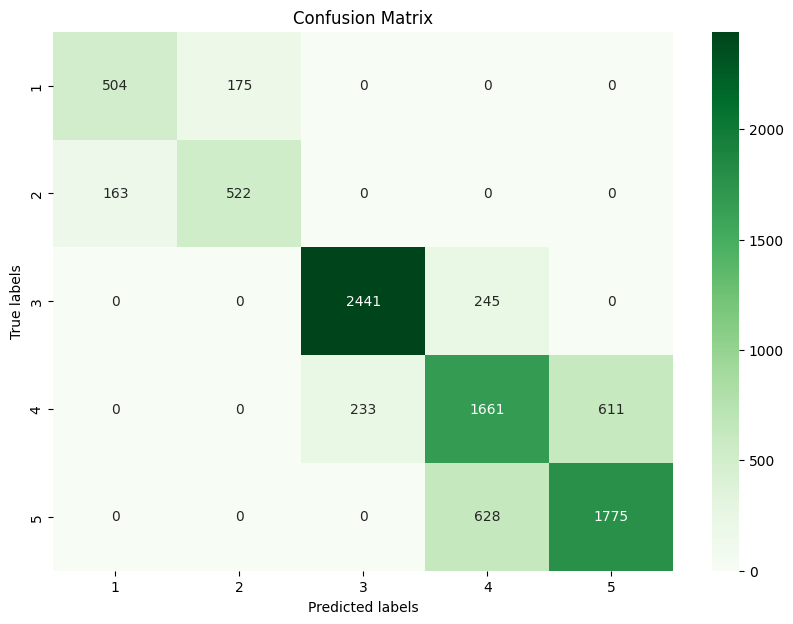

In [ ]:
conf_matrix = confusion_matrix(y_val, y_pred)
plot_confusion_matrix(conf_matrix, [1, 2, 3, 4, 5])

In [ ]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_val, y_pred)
print(acc_score)

0.7705961152042867


In [ ]:
from sklearn.experimental import enable_halving_search_cv  # Explicitly require this to enable the experimental class
from sklearn.model_selection import HalvingGridSearchCV


def halving_grid_search(estimator, param_grid, x_train, y_train, scoring=None, factor=2,
                        resource='n_samples', min_resources='exhaust', aggressive_elimination=True):
    # Initialize the HalvingGridSearchCV object
    search = HalvingGridSearchCV(estimator, param_grid, scoring=scoring, factor=factor,
                                 min_resources=min_resources, aggressive_elimination=aggressive_elimination,
                                 cv=5, n_jobs=-1, refit=True)

    # Fit the halving grid search on the training data
    search.fit(x_train, y_train)

    # print results
    print(search.cv_results_)
    print(f"\nBest Score: {search.best_score_}")
    print(f"\nBest Parameters: {search.best_params_}")
    # Return the fitted search object
    return search

In [56]:
estimator = DecisionTreeClassifier(random_state=100)

param_grid = {
    'max_depth': [None, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [3, 6, 9, 12, 15, 20],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'criterion': ['gini', 'entropy'],
    'max_leaf_nodes': [None, 10, 20, 50, 75, 100]
}

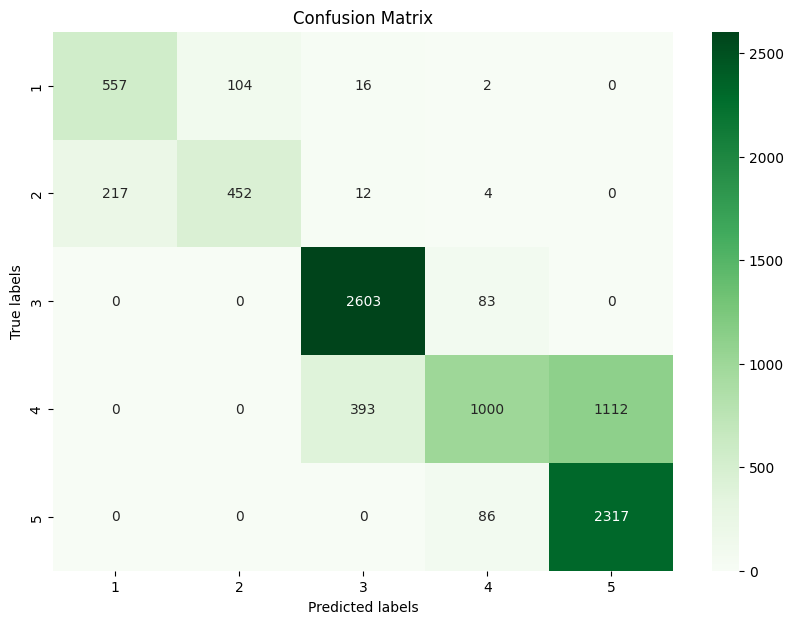

0.7734985487832106


In [82]:
#import decision tree
from sklearn.tree import DecisionTreeClassifier

#create a decision tree

dt = DecisionTreeClassifier(random_state=100, max_leaf_nodes=75, min_samples_leaf=3, max_features = 10)
dt.fit(x_train, y_train)

# Evaluate the Model
y_pred = dt.predict(x_val)
y_pred
cm = confusion_matrix(y_val, y_pred)
plot_confusion_matrix(cm, [1, 2, 3, 4, 5])
from sklearn.metrics import balanced_accuracy_score, f1_score, average_precision_score

acc_score_dt = accuracy_score(y_val, y_pred)

print(acc_score_dt)

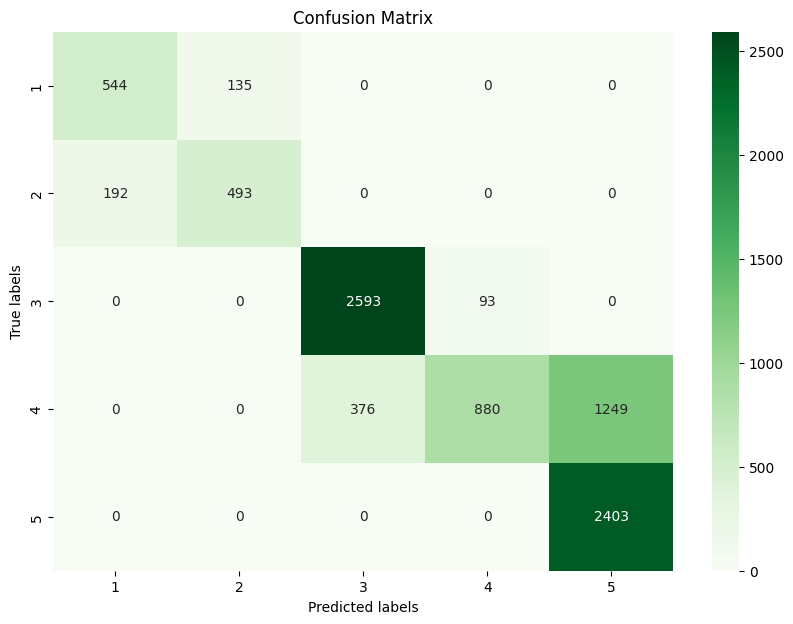

0.7717124358115651


In [83]:
#import random forest
from sklearn.ensemble import RandomForestClassifier

#create a random forest
forest_model = RandomForestClassifier(criterion='entropy',n_estimators=100, random_state=100, max_features='log2', max_leaf_nodes=75, min_samples_leaf=3)
#forest_model = RandomForestClassifier(criterion='gini',n_estimators=10)
forest_model.fit(x_train, y_train)


# Evaluate the Model
y_pred = forest_model.predict(x_val)
y_pred
cm = confusion_matrix(y_val, y_pred)
plot_confusion_matrix(cm, [1, 2, 3, 4, 5])

acc_score_rf = accuracy_score(y_val, y_pred)

print(acc_score_rf)


0:	learn: 1.3700622	total: 132ms	remaining: 13s
1:	learn: 1.2087221	total: 250ms	remaining: 12.3s
2:	learn: 1.0905441	total: 355ms	remaining: 11.5s
3:	learn: 1.0000745	total: 485ms	remaining: 11.6s
4:	learn: 0.9168430	total: 635ms	remaining: 12.1s
5:	learn: 0.8489761	total: 761ms	remaining: 11.9s
6:	learn: 0.7893185	total: 878ms	remaining: 11.7s
7:	learn: 0.7421565	total: 1s	remaining: 11.5s
8:	learn: 0.6992586	total: 1.17s	remaining: 11.9s
9:	learn: 0.6631480	total: 1.31s	remaining: 11.8s
10:	learn: 0.6309152	total: 1.46s	remaining: 11.8s
11:	learn: 0.6024819	total: 1.58s	remaining: 11.6s
12:	learn: 0.5749139	total: 1.73s	remaining: 11.6s
13:	learn: 0.5543363	total: 1.87s	remaining: 11.5s
14:	learn: 0.5361202	total: 2.04s	remaining: 11.5s
15:	learn: 0.5197262	total: 2.17s	remaining: 11.4s
16:	learn: 0.5032548	total: 2.28s	remaining: 11.1s
17:	learn: 0.4869287	total: 2.38s	remaining: 10.9s
18:	learn: 0.4738062	total: 2.5s	remaining: 10.7s
19:	learn: 0.4619556	total: 2.62s	remaining: 10

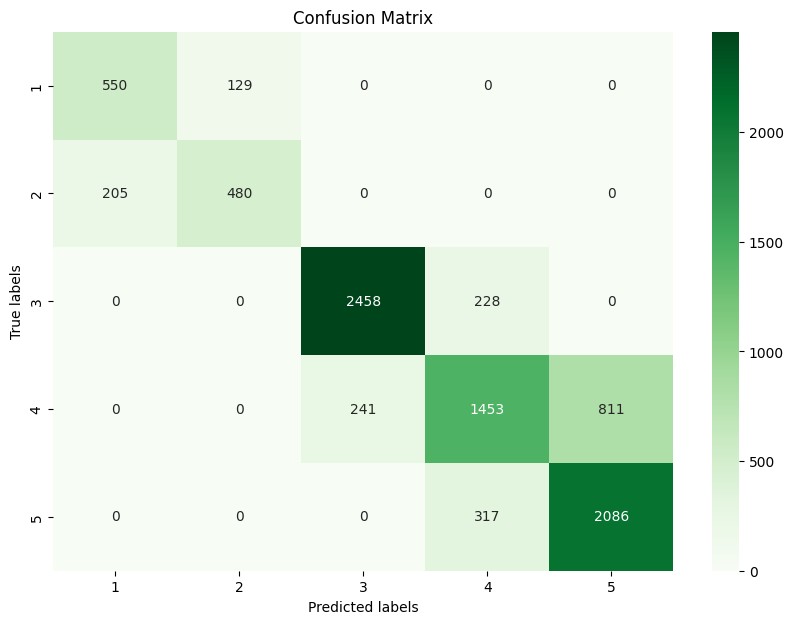

0.784438490734539


In [84]:
#import cat boosted model
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=10, loss_function='MultiClass')
cat_model.fit(x_train, y_train)

# Evaluate the Model
y_pred = cat_model.predict(x_val)
y_pred
cm = confusion_matrix(y_val, y_pred)
plot_confusion_matrix(cm, [1, 2, 3, 4, 5])

acc_score_cb = accuracy_score(y_val, y_pred)

print(acc_score_cb)

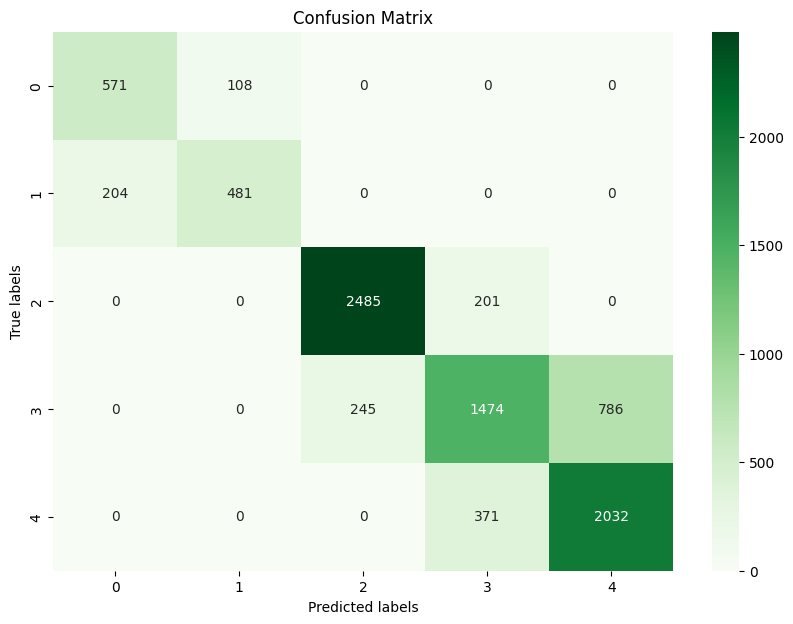

0.7862246037061844


In [85]:
#import xgboost model
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1)
xgb_model.fit(x_train, y_train-1)

# Evaluate the Model
y_pred = xgb_model.predict(x_val)
y_pred
cm = confusion_matrix(y_val-1, y_pred)
plot_confusion_matrix(cm, [0, 1, 2, 3, 4])

acc_score_xgb = accuracy_score(y_val-1, y_pred)

print(acc_score_xgb)

In [99]:
print("Decision Tree", "     Random Forest", "     CatBoost", "         XGBoost")
print(acc_score_dt, acc_score_rf, acc_score_cb, acc_score_xgb)

Decision Tree      Random Forest      CatBoost          XGBoost
0.7734985487832106 0.7717124358115651 0.784438490734539 0.7862246037061844


In [ ]:
halving_grid_search(estimator, param_grid, x_train, y_train, scoring=average_precision_score)

In [65]:
# Build Decision Tree Model
dt2 = DecisionTreeClassifier(criterion='gini', max_depth=15,
                                       max_features='sqrt', max_leaf_nodes=75,
                                       min_samples_leaf=3, min_samples_split=10,
                                       random_state=100)
dt2.fit(x_train, y_train)

# Evaluate the Model
y_pred = dt.predict(x_val)
y_pred

array([4, 4, 3, ..., 5, 5, 4], dtype=int64)

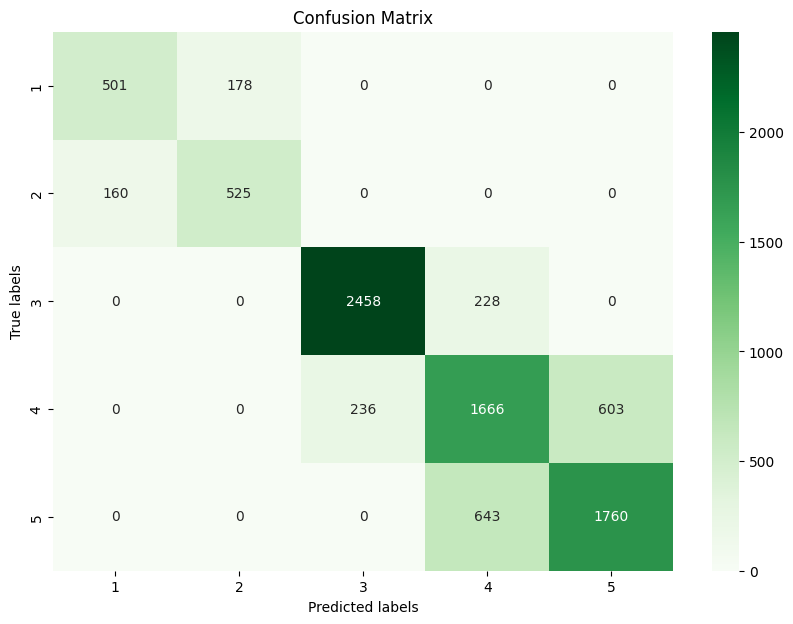

0.7713775396293816


In [66]:
cm = confusion_matrix(y_val, y_pred)
plot_confusion_matrix(cm, [1, 2, 3, 4, 5])


acc_score = accuracy_score(y_val, y_pred)

print(acc_score)

Correlations

In [ ]:
train = pd.concat([x_train, y_train], axis=1)
train.head()

,age,joining_date,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,region_category,membership_category,preferred_offer_types,medium_of_operation,internet_option,complaint_status,feedback,gender_F,gender_M,gender_Unknown,joined_through_referral_No,joined_through_referral_Yes,joined_through_referral_unknown,used_special_discount_Yes,used_special_discount_No,offer_application_preference_Yes,offer_application_preference_No,past_complaint_No,past_complaint_Yes,churn_risk_score
19882,15.0,20170902.0,12.0,761.13,11837.89,7.012377e+14,663.570000,3.632023,4.662926,3.716599,3.618017,3.617551,3.607949,3.980593,1,0,0,0,1,0,0,1,1,0,1,0,5.0
7579,52.0,20160305.0,16.0,326.28,16165.10,5.000000e+01,719.810000,3.623191,3.033083,3.604253,3.658755,3.605327,3.607949,3.984163,1,0,0,1,0,0,1,0,0,1,1,0,3.0
22570,31.0,20170227.0,11.0,67.18,16428.22,1.800000e+02,393.915000,3.623191,4.662926,3.604253,3.587074,3.605327,3.632857,3.972443,1,0,0,1,0,0,1,0,0,1,0,1,4.0
13822,35.0,20170815.0,5.0,62.58,53214.02,1.800000e+02,802.670000,3.623191,3.033083,3.526273,3.587074,3.624795,3.598448,1.527732,0,1,0,0,1,0,0,1,1,0,0,1,1.0
2704,63.0,20170609.0,23.0,144.52,22194.83,2.300000e+02,687.439859,3.635807,4.663523,3.716599,3.658755,3.624795,3.607949,4.004116,0,1,0,1,0,0,1,0,0,1,1,0,5.0


In [ ]:
corr = train.corr()
corr = abs(corr['churn_risk_score']).sort_values(ascending=False).to_frame()
corr

,churn_risk_score
churn_risk_score,1.000000
membership_category,0.798493
feedback,0.748746
points_in_wallet,0.380294
avg_transaction_value,0.358187
preferred_offer_types,0.066760
joined_through_referral_No,0.053797
joined_through_referral_Yes,0.049797
offer_application_preference_Yes,0.035364
offer_application_preference_No,0.035364


Visualize Correlations

<Axes: >

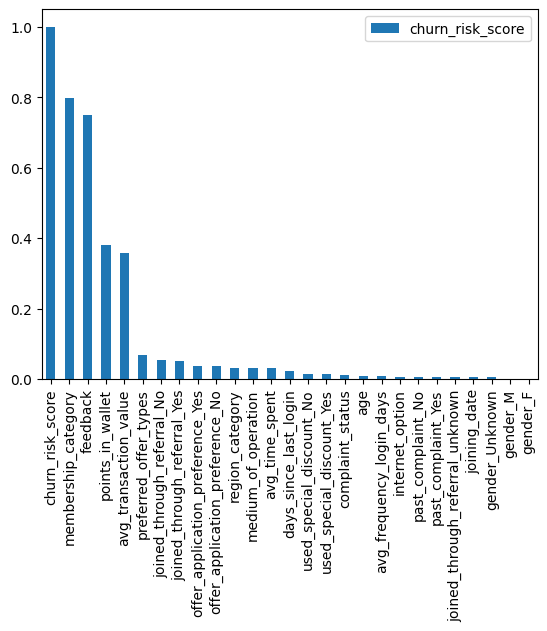

In [ ]:
corr.plot(kind="bar")

Feature Importance

In [ ]:
dt_imp_df = pd.DataFrame(
    {
        'feature': x_train.columns.values.tolist(),
        'importance': dt.feature_importances_
    }
).sort_values(by='importance', ascending=False)
dt_imp_df

,feature,importance
8,membership_category,0.577021
6,points_in_wallet,0.195777
4,avg_transaction_value,0.149229
13,feedback,0.046086
5,avg_frequency_login_days,0.019468
2,days_since_last_login,0.003061
3,avg_time_spent,0.001831
1,joining_date,0.001318
7,region_category,0.001221
20,used_special_discount_Yes,0.001069


Visualize feature importances

<ipython-input-385-2849c4df813c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=dt_imp_df, palette='viridis')


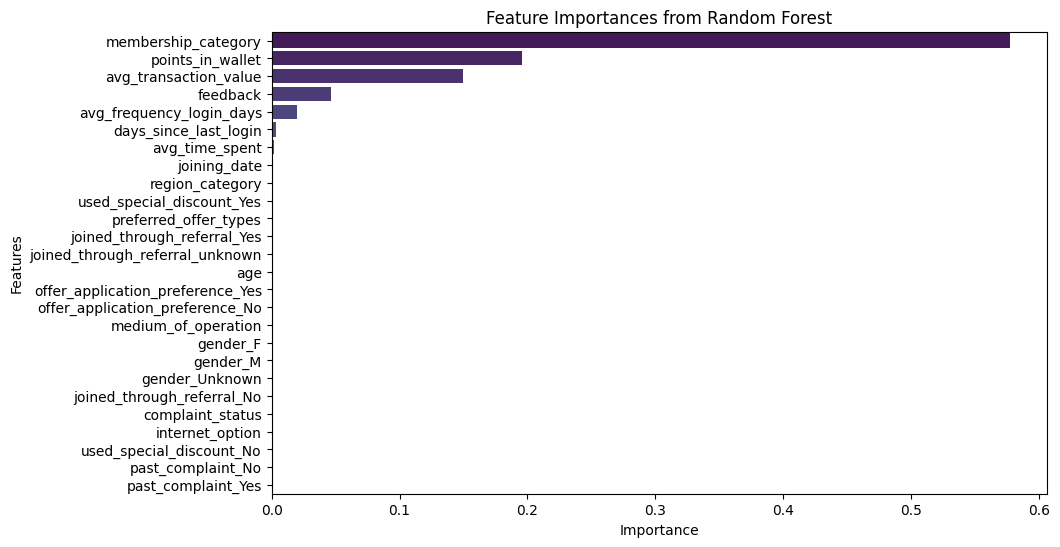

In [ ]:
plt.figure(figsize=(10, 6))

sns.barplot(x='importance', y='feature', data=dt_imp_df, palette='viridis')

# Add plot labels and title
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances from Random Forest')
plt.show()

Visualizing the tree structures

In [ ]:
model = dt

# Get the decision path for the first sample
node_indicator = model.decision_path(x_val)
# Extract the path indices for the first sample
sample_id = 0  # Change this to other indices if you want to check other samples
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:node_indicator.indptr[sample_id + 1]]

print("The decision path for the sample includes the following nodes:")

for node_id in node_index:
    if model.tree_.feature[node_id] != -2:  # Check if it's not a leaf node
        # For non-leaf nodes, display the decision rule
        print(f"Node {node_id}: go to node {node_id + 1} if X[:, {model.tree_.feature[node_id]}] <= {model.tree_.threshold[node_id]:.2f}")
    else:
        # For leaf nodes, display the predicted class
        print(f"Node {node_id}: leaf node, predicted class = {model.classes_[np.argmax(model.tree_.value[node_id])]}")

The decision path for the sample includes the following nodes:
Node 0: go to node 1 if X[:, 7] <= 3.57
Node 2: go to node 3 if X[:, 4] <= 50016.03
Node 3: go to node 4 if X[:, 3] <= 251.86
Node 7: go to node 8 if X[:, 8] <= 3.99
Node 9: go to node 10 if X[:, 5] <= 45.00
Node 16: go to node 17 if X[:, 6] <= 687.25
Node 18: go to node 19 if X[:, 18] <= 0.50
Node 28: go to node 29 if X[:, 23] <= 0.50
Node 57: go to node 58 if X[:, 1] <= 20160626.00
Node 107: go to node 108 if X[:, 13] <= 2.76
Node 110: leaf node, predicted class = 3.0


In [ ]:
def plot_decision_path(tree, sample_data):
    node_indicator = tree.decision_path(sample_data)
    path = node_indicator.indices[node_indicator.indptr[0]:node_indicator.indptr[1]]

    plt.figure(figsize=(20,10))
    decision_plot = plot_tree(tree, filled=True, rounded=True, class_names=tree.classes_)

    # Highlight the nodes that the first sample passes through
    for n, node in enumerate(decision_plot):
        if n in path:
            # Change the node's properties (e.g., fill color)
            node.set_fillcolor('#ffd700')

    plt.show()

In [ ]:
!pip install graphviz

In [ ]:
import graphviz

In [ ]:
from sklearn.tree import export_graphviz, plot_tree

[Text(0.45987654320987653, 0.96875, 'x[7] <= 3.571\ngini = 0.748\nsamples = 22585\nvalue = [1622.0, 1765.0, 6574.0, 6331.0, 6293.0]'),
 Text(0.21296296296296297, 0.90625, 'x[8] <= 3.987\ngini = 0.765\nsamples = 2834\nvalue = [258, 300, 747, 770, 759]'),
 Text(0.2006172839506173, 0.84375, 'x[1] <= 20150603.0\ngini = 0.697\nsamples = 1682\nvalue = [258, 300, 747, 377, 0]'),
 Text(0.1882716049382716, 0.78125, 'gini = 0.698\nsamples = 254\nvalue = [31, 42, 104, 77, 0]'),
 Text(0.21296296296296297, 0.78125, 'x[4] <= 50025.834\ngini = 0.695\nsamples = 1428\nvalue = [227, 258, 643, 300, 0]'),
 Text(0.13580246913580246, 0.71875, 'x[2] <= 18.5\ngini = 0.615\nsamples = 1174\nvalue = [110, 121, 643, 300, 0]'),
 Text(0.06172839506172839, 0.65625, 'x[8] <= 2.725\ngini = 0.629\nsamples = 991\nvalue = [96, 103, 520, 272, 0]'),
 Text(0.024691358024691357, 0.59375, 'x[2] <= 13.5\ngini = 0.493\nsamples = 385\nvalue = [72, 54, 259, 0, 0]'),
 Text(0.012345679012345678, 0.53125, 'gini = 0.442\nsamples = 27

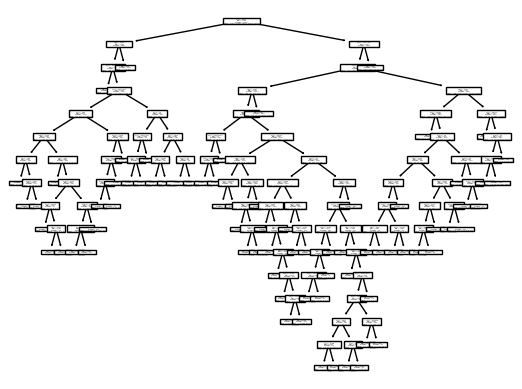

In [ ]:
plot_tree(dt)

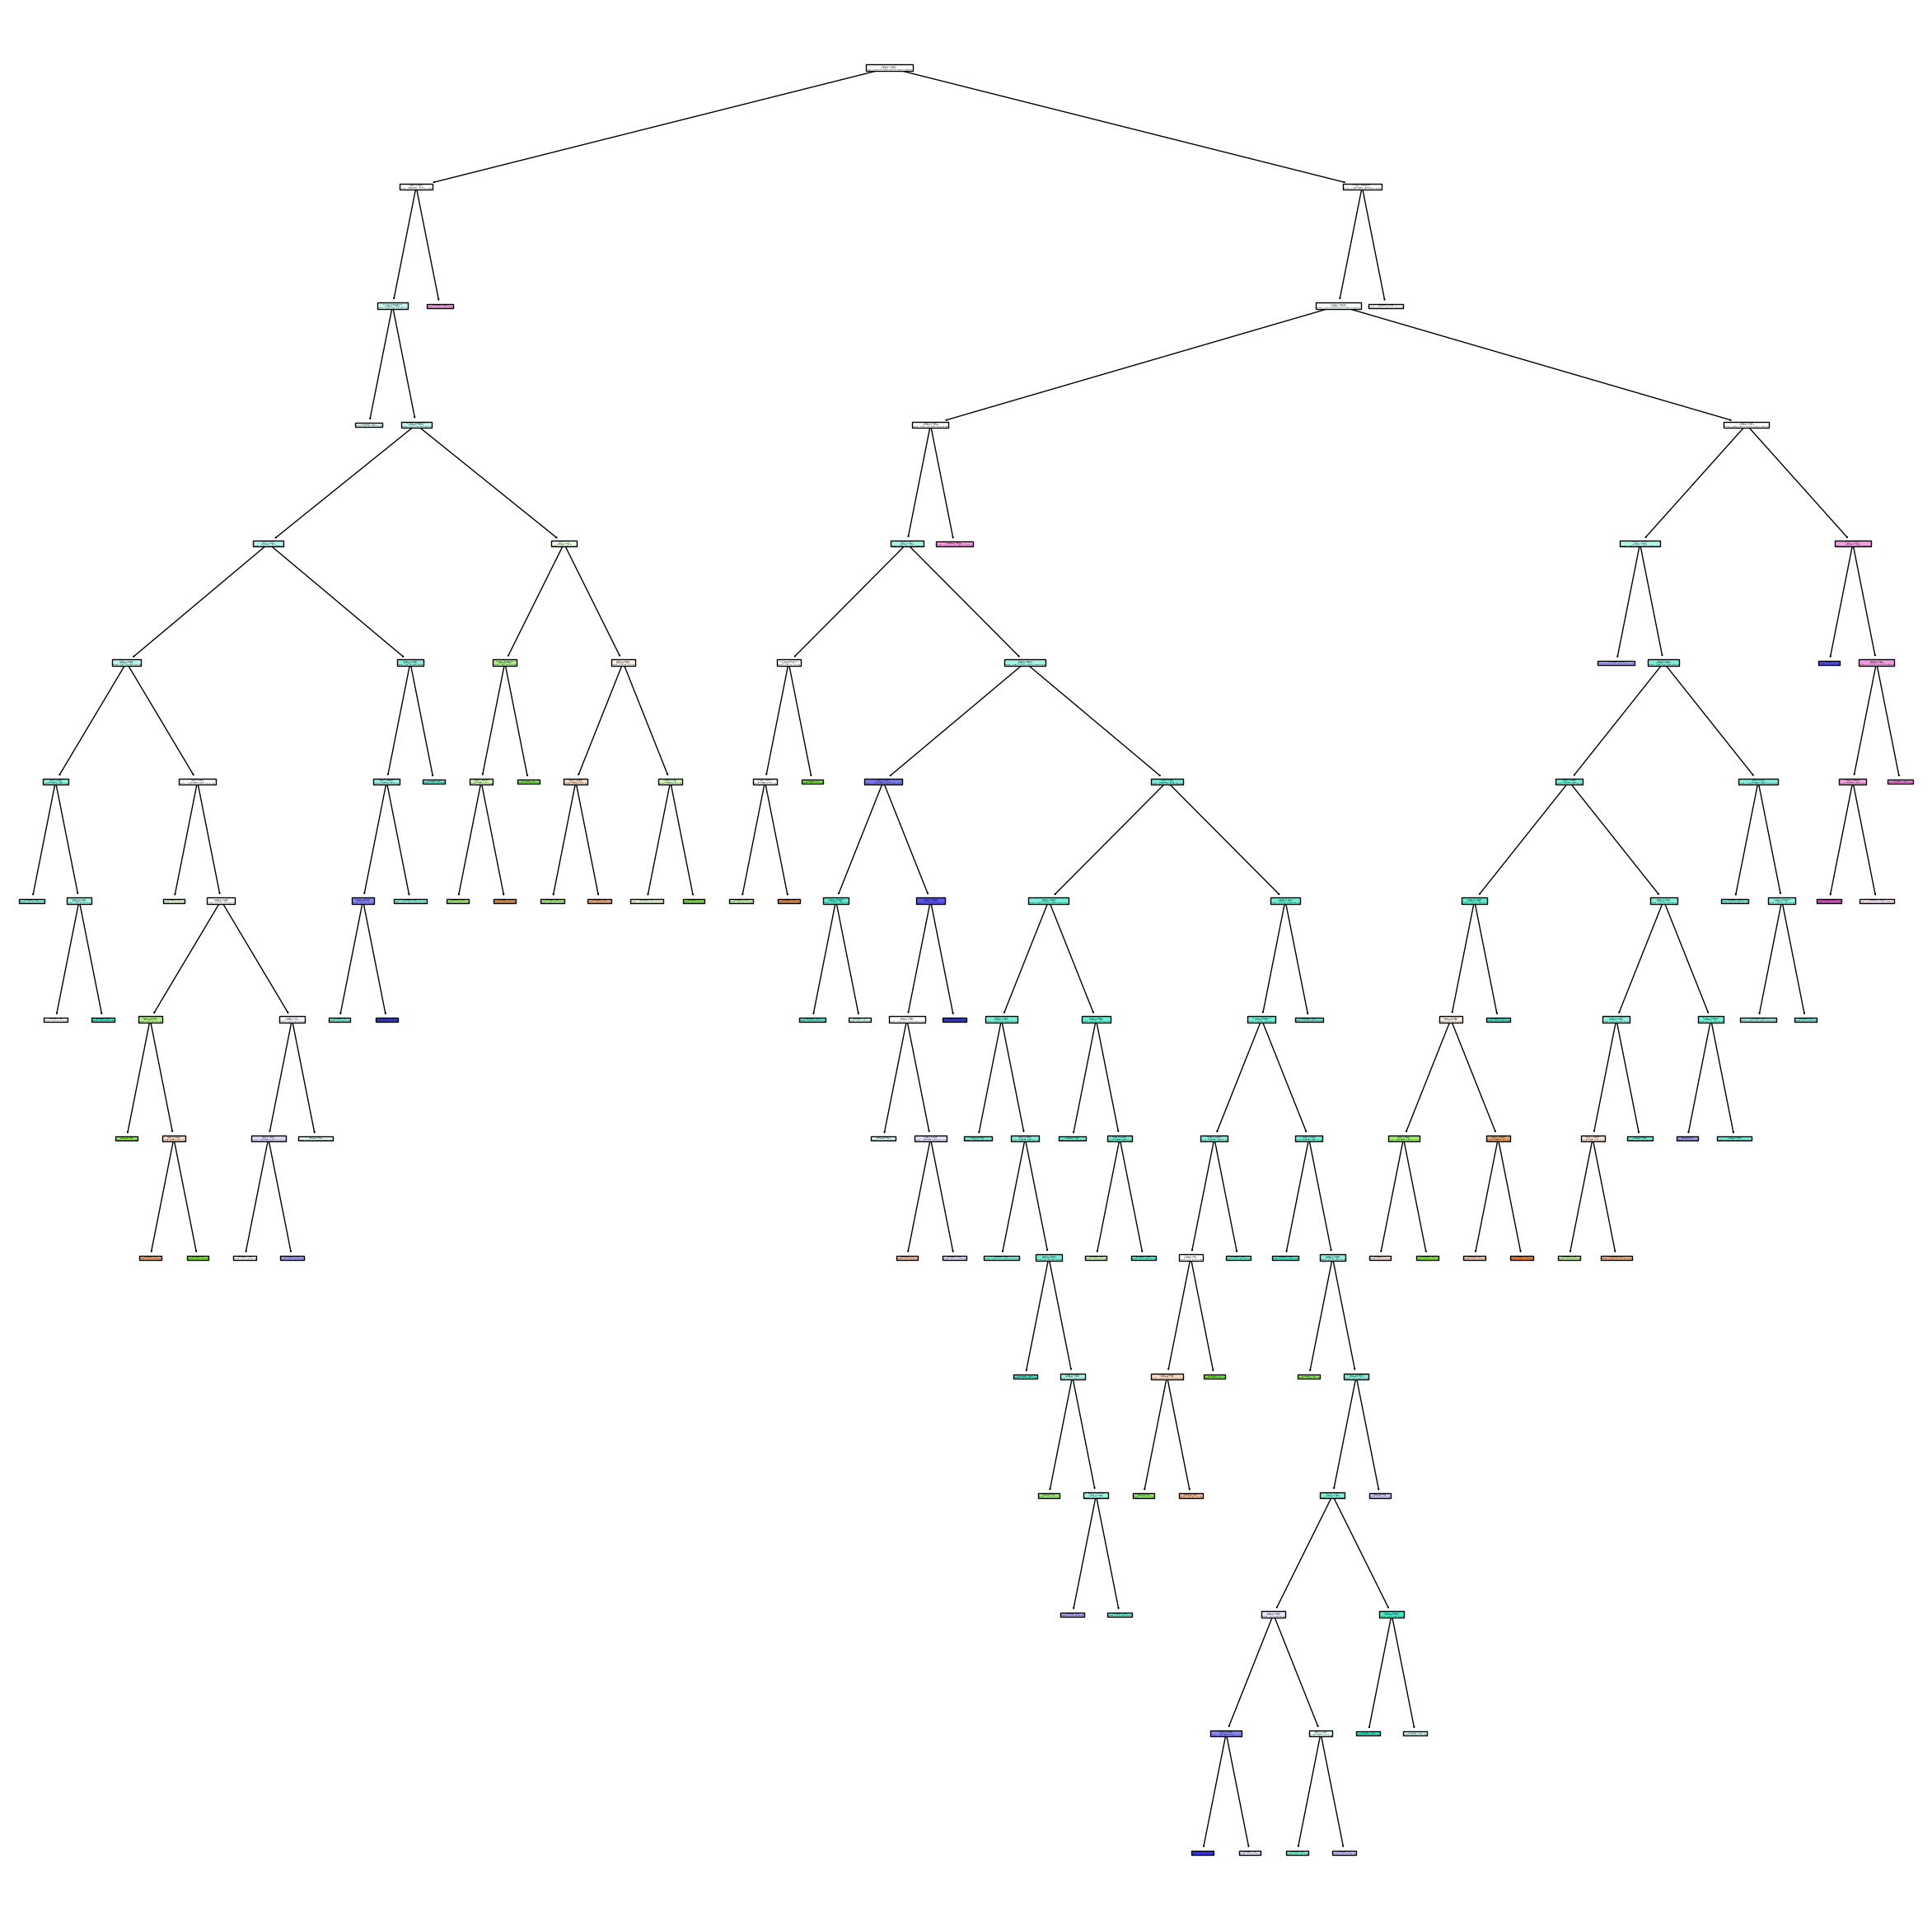

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (30, 30))

plot_tree(dt, filled = True)
plt.show()
fig.savefig('./tree.png')

Ignore the code below for now

In [ ]:
.style.format({'RMSE_train': '{:.2f}', 'RMSE_test': '{:.2f}',
     'R2_test': '{:.3f}'}
).background_gradient(
    cmap='viridis_r', low=0.1, high=1,
    subset=['RMSE_train', 'RMSE_test']

In [ ]:
# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(
    Y_test.ravel(), y_score.ravel()
)
average_precision["micro"] = average_precision_score(Y_test, y_score, average="micro")